In [1]:
import pandas as pd

def ucitaj_podatke(putanja):
    columns=['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'Copyist']
    df=pd.read_csv(putanja)
    df.columns=columns
    return df

In [2]:
df_trening=ucitaj_podatke('avila/avila-tr.txt')
df_test=ucitaj_podatke('avila/avila-ts.txt')
df_trening

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Copyist
0,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
1,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
2,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
3,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
4,0.117948,-0.220579,-3.210528,-1.623238,0.261718,-0.349509,0.257927,-0.385979,-0.247731,-0.331310,A
...,...,...,...,...,...,...,...,...,...,...,...
10424,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10425,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10426,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10427,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [3]:
df_test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,Copyist
0,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
1,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
2,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
3,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
4,0.068573,-0.181323,-3.210528,-0.294311,-1.168333,0.356414,-0.006326,-0.219550,0.126447,0.448186,F
...,...,...,...,...,...,...,...,...,...,...,...
10431,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10432,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10433,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10434,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [4]:
df_trening.isna().any().any() #ne postoje nedostajuce vrednosti u trening skupu

False

In [5]:
df_test.isna().any().any() #ne postoje nedostajuce vrednosti u test skupu

False

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [7]:
def distribucija_hist_plt(df):
    X=df.iloc[:, :-1]
    y=df.iloc[:, -1]
    list = y.values.tolist()
    flat_list=[item for sublist in list for item in sublist]
    flat_list.sort()
    
    counts=Counter(flat_list)
    labels, values = zip(*counts.items())
    indexes=np.arange(len(labels))
    
    plt.bar(indexes, values, align='center')
    plt.title("Distribucija klasa skupa")
    plt.xticks(indexes, labels)
    plt.show()
    return X, y

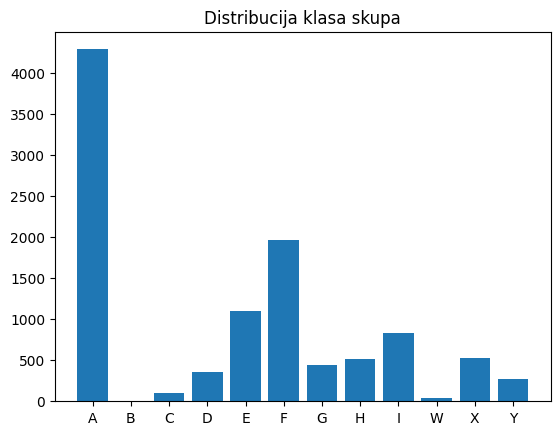

In [8]:
X_train, y_train=distribucija_hist_plt(df_trening) #podaci su nam vec podeljeni na trening i test

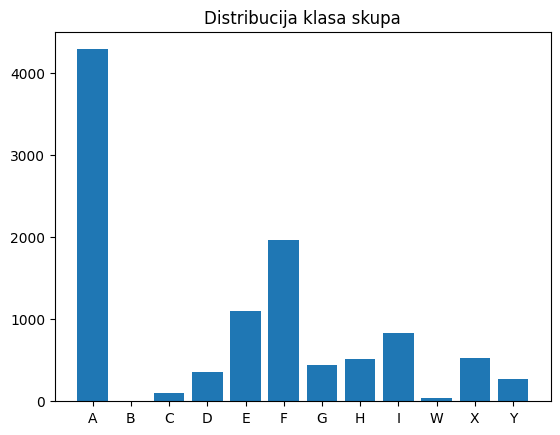

In [9]:
X_test, y_test=distribucija_hist_plt(df_test)

In [10]:
import seaborn as sns

<Axes: >

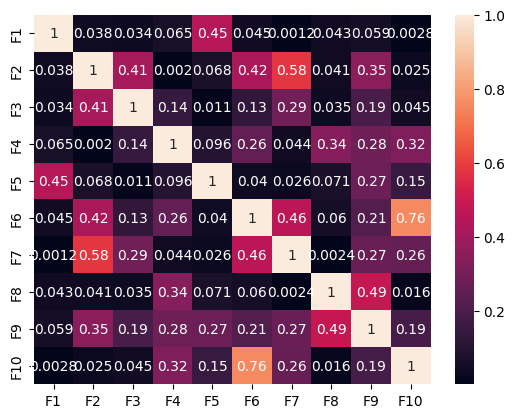

In [11]:
sns.heatmap(X_train.corr().abs(), annot=True) #matrica korelacije atributa

In [12]:
from sklearn.ensemble import RandomForestClassifier #randomforest nije osetljiv na autlajere
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print("Classification report for model {} on {} data".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")

In [14]:
def prikaz_matrice_konfuzije(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted labels', fontsize=12)
    ax.set_ylabel('True labels', fontsize=12)
    ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y'], fontsize=10)
    ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y'], fontsize=10)
    plt.show()

In [15]:
def prikaz_vaznosti_atributa(model, X):
    pd.Series(model.feature_importances_, index=X.columns).plot.barh()
    plt.title("Feature importance")
    plt.show()

In [16]:
rf=RandomForestClassifier() #pravimo model pomocu anslambla slucajnih suma
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
accuracy=accuracy_score(y_test, y_pred)
print(f"Tacnost RandomForest modela: {round(accuracy*100, 2)}%")

Tacnost RandomForest modela: 98.18%


In [17]:
report(rf, X_train, y_train) # za svaku instancu je odredio tacnu klasu, mozda je doslo do preprilagodjavanja

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      4285
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00       103
           D       1.00      1.00      1.00       352
           E       1.00      1.00      1.00      1095
           F       1.00      1.00      1.00      1961
           G       1.00      1.00      1.00       446
           H       1.00      1.00      1.00       519
           I       1.00      1.00      1.00       831
           W       1.00      1.00      1.00        44
           X       1.00      1.00      1.00       522
           Y       1.00      1.00      1.00       266

    accuracy                           1.00     10429
   macro avg       1.00      1.00      1.00     10429
weighted avg       1.00      1.00 

In [18]:
report(rf, X_test, y_test, "test") # i na test skupu daje jako dobre rezultate, pretpostavljamo da je model jako dobar

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.97      0.99      0.98      4286
           B       1.00      1.00      1.00         5
           C       0.97      0.96      0.97       103
           D       1.00      0.97      0.99       353
           E       0.97      0.97      0.97      1095
           F       0.99      0.97      0.98      1962
           G       0.99      0.96      0.97       447
           H       0.99      0.96      0.97       520
           I       1.00      1.00      1.00       832
           W       1.00      1.00      1.00        44
           X       1.00      0.96      0.98       522
           Y       1.00      1.00      1.00       267

    accuracy                           0.98     10436
   macro avg       0.99      0.98      0.98     10436
weighted avg       0.98      0.98     

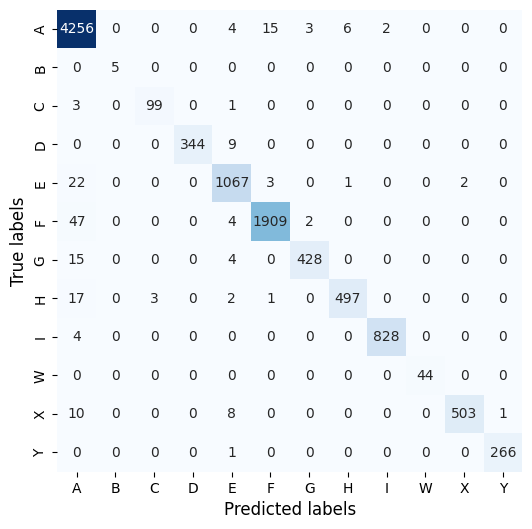

In [19]:
prikaz_matrice_konfuzije(y_test, y_pred)

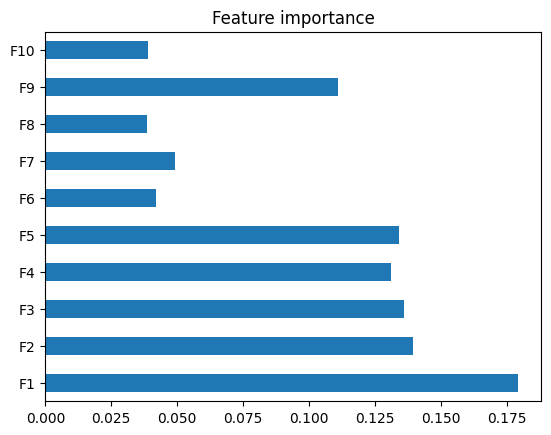

In [20]:
prikaz_vaznosti_atributa(rf, X_train)

In [21]:
from sklearn.neighbors import KNeighborsClassifier #knn je osetljiv na autlajere, zato cemo se prvo pozabaviti njima
from sklearn.model_selection import GridSearchCV

In [22]:
def IQR(X, feature_names):
    
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percantage'])
    for name in feature_names:
        #print(data[name])
        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower

        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()

        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)

        iqr.loc[name, 'num_lower'], iqr.loc[name, 'num_upper'], iqr.loc[name, 'percantage']  = num_of_out_lower, num_of_out_upper, percentage
        iqr.loc[name, 'min'], iqr.loc[name, 'max'] = min(X[name]), max(X[name])    
    return iqr

In [23]:
feature_names=X_train.columns
IQR(X_train, feature_names) #imamo znacajan broj autlajera, ne mozemo ih bas zanemariti

,lower,min,num_lower,upper,max,num_upper,percantage
F1,-0.628855,-3.498799,504,0.704281,11.819916,490,10
F2,-0.954663,-2.426761,366,0.898214,386.000000,117,5
F3,-0.367185,-3.210528,870,0.785092,50.000000,85,9
F4,-2.307320,-5.440122,227,2.437528,3.987152,23,2
F5,0.038273,-4.922215,1540,0.395785,1.066121,1093,25
F6,-2.342702,-7.450257,117,2.308082,53.000000,218,3
F7,-0.780208,-11.935457,1382,1.182811,83.000000,175,15
F8,-2.337352,-4.247781,258,2.450252,13.173081,48,3
F9,-1.682079,-5.486218,621,1.810245,44.000000,365,9
F10,-2.086585,-6.719324,234,2.101367,4.671232,231,4


In [24]:
def rad_sa_autlajerima(df) : # vraca skup sa odsecanjem autlajera, i sa odbacivanjem autlajera
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    q1 = df[numeric_cols].quantile(0.25)
    q3 = df[numeric_cols].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_no_outliers = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

    num_outliers = len(df) - len(df_no_outliers)

    outliers_replaced = df.copy()
    for col in numeric_cols:
        lower_bound = outliers_replaced[col].quantile(0.01)
        upper_bound = outliers_replaced[col].quantile(0.99)
        outliers_replaced[col] = np.where(outliers_replaced[col] < lower_bound, lower_bound, outliers_replaced[col])
        outliers_replaced[col] = np.where(outliers_replaced[col] > upper_bound, upper_bound, outliers_replaced[col])
    return outliers_replaced, df_no_outliers, num_outliers  

In [25]:
autlajer_odseceno, bez_autlajera, broj_autlajera=rad_sa_autlajerima(df_trening)

In [26]:
param_grid = {'n_neighbors': range(2, 7),
              'weights': ['uniform', 'distance']}

In [27]:
gs = GridSearchCV(KNeighborsClassifier(),
             param_grid=param_grid,
             scoring='accuracy',
             cv=4,
             verbose=5)

In [28]:
gs.fit(autlajer_odseceno.iloc[:, :-1], autlajer_odseceno.iloc[:, -1])


Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END ....n_neighbors=2, weights=uniform;, score=0.718 total time=   0.2s
[CV 2/4] END ....n_neighbors=2, weights=uniform;, score=0.717 total time=   0.2s
[CV 3/4] END ....n_neighbors=2, weights=uniform;, score=0.713 total time=   0.2s
[CV 4/4] END ....n_neighbors=2, weights=uniform;, score=0.713 total time=   0.2s
[CV 1/4] END ...n_neighbors=2, weights=distance;, score=0.732 total time=   0.1s
[CV 2/4] END ...n_neighbors=2, weights=distance;, score=0.740 total time=   0.1s
[CV 3/4] END ...n_neighbors=2, weights=distance;, score=0.740 total time=   0.1s
[CV 4/4] END ...n_neighbors=2, weights=distance;, score=0.748 total time=   0.1s
[CV 1/4] END ....n_neighbors=3, weights=uniform;, score=0.725 total time=   0.2s
[CV 2/4] END ....n_neighbors=3, weights=uniform;, score=0.717 total time=   0.2s
[CV 3/4] END ....n_neighbors=3, weights=uniform;, score=0.723 total time=   0.2s
[CV 4/4] END ....n_neighbors=3, weights=uniform;

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 7),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=5)

In [29]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [30]:
knn_model_odseceno= KNeighborsClassifier(n_neighbors=2, weights='distance') #izabrali smo parametre koje nam je vratio grid
knn_model_odseceno.fit(autlajer_odseceno.iloc[:, :-1], autlajer_odseceno.iloc[:, -1])

y_pred = knn_model_odseceno.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Tacnost KNN modela sa odsecanjem: {round(accuracy*100, 2)}")

Tacnost KNN modela sa odsecanjem: 75.69


In [31]:
report(knn_model_odseceno, X_train, y_train) # na trening skupu radi sa 100% tacnosti

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       1.00      1.00      1.00      4285
           B       1.00      1.00      1.00         5
           C       1.00      1.00      1.00       103
           D       1.00      1.00      1.00       352
           E       1.00      1.00      1.00      1095
           F       1.00      1.00      1.00      1961
           G       1.00      1.00      1.00       446
           H       1.00      1.00      1.00       519
           I       1.00      1.00      1.00       831
           W       1.00      1.00      1.00        44
           X       1.00      1.00      1.00       522
           Y       1.00      1.00      1.00       266

    accuracy                           1.00     10429
   macro avg       1.00      1.00      1.00     10429
weighted avg       1.00      1.00   

In [32]:
report(knn_model_odseceno, X_test, y_test, "test") #na test skupu pravi znacajnije greske, ali nije toliko strasno

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.79      0.80      0.80      4286
           B       1.00      1.00      1.00         5
           C       0.73      0.54      0.62       103
           D       0.72      0.61      0.66       353
           E       0.76      0.70      0.73      1095
           F       0.63      0.68      0.65      1962
           G       0.61      0.60      0.61       447
           H       0.62      0.62      0.62       520
           I       0.98      0.96      0.97       832
           W       0.72      0.77      0.75        44
           X       0.90      0.85      0.87       522
           Y       0.83      0.80      0.82       267

    accuracy                           0.76     10436
   macro avg       0.77      0.75      0.76     10436
weighted avg       0.76      0.76      0

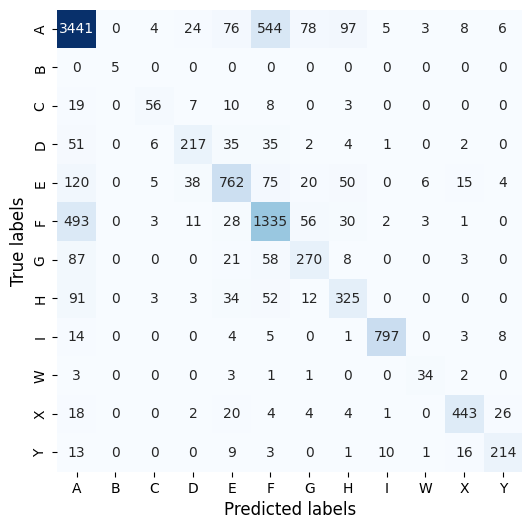

In [33]:
prikaz_matrice_konfuzije(y_test, y_pred) #najvise gresi za klasu A koja je i najbrojnija. Cesto pravi zamene klase F i A 

In [34]:
gs.fit(bez_autlajera.iloc[:, :-1], bez_autlajera.iloc[:, -1])

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END ....n_neighbors=2, weights=uniform;, score=0.667 total time=   0.1s
[CV 2/4] END ....n_neighbors=2, weights=uniform;, score=0.651 total time=   0.1s
[CV 3/4] END ....n_neighbors=2, weights=uniform;, score=0.651 total time=   0.1s
[CV 4/4] END ....n_neighbors=2, weights=uniform;, score=0.660 total time=   0.1s
[CV 1/4] END ...n_neighbors=2, weights=distance;, score=0.671 total time=   0.0s
[CV 2/4] END ...n_neighbors=2, weights=distance;, score=0.679 total time=   0.0s
[CV 3/4] END ...n_neighbors=2, weights=distance;, score=0.666 total time=   0.0s
[CV 4/4] END ...n_neighbors=2, weights=distance;, score=0.692 total time=   0.0s
[CV 1/4] END ....n_neighbors=3, weights=uniform;, score=0.689 total time=   0.1s
[CV 2/4] END ....n_neighbors=3, weights=uniform;, score=0.663 total time=   0.1s
[CV 3/4] END ....n_neighbors=3, weights=uniform;, score=0.670 total time=   0.1s
[CV 4/4] END ....n_neighbors=3, weights=uniform;

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 7),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=5)

In [35]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [36]:
knn_model_bez = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_model_bez.fit(bez_autlajera.iloc[:, :-1], bez_autlajera.iloc[:, -1])

y_pred = knn_model_bez.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Tacnost KNN modela: {round(accuracy*100, 2)}")

Tacnost KNN modela: 56.6


In [37]:
report(knn_model_bez, X_train, y_train) #bez autlajera mnogo gresi i na trening skupu

Classification report for model KNeighborsClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.80      0.85      0.82      4285
           B       0.00      0.00      0.00         5
           C       0.37      0.73      0.49       103
           D       0.62      0.47      0.53       352
           E       0.61      0.76      0.68      1095
           F       0.73      0.80      0.76      1961
           G       0.76      0.86      0.81       446
           H       0.58      0.90      0.70       519
           I       0.00      0.00      0.00       831
           W       0.59      0.23      0.33        44
           X       0.69      0.69      0.69       522
           Y       0.00      0.00      0.00       266

    accuracy                           0.72     10429
   macro avg       0.48      0.52      0.48     10429
weighted avg       0.65      0.72   

/home/lazar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lazar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lazar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
report(knn_model_bez, X_test, y_test, "test") #na test skupu gresi jos vise

Classification report for model KNeighborsClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           A       0.65      0.74      0.70      4286
           B       0.00      0.00      0.00         5
           C       0.22      0.32      0.26       103
           D       0.35      0.22      0.27       353
           E       0.48      0.54      0.51      1095
           F       0.50      0.58      0.54      1962
           G       0.51      0.50      0.51       447
           H       0.40      0.57      0.47       520
           I       0.00      0.00      0.00       832
           W       0.25      0.05      0.08        44
           X       0.69      0.68      0.69       522
           Y       0.00      0.00      0.00       267

    accuracy                           0.57     10436
   macro avg       0.34      0.35      0.33     10436
weighted avg       0.51      0.57      0

/home/lazar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lazar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lazar/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


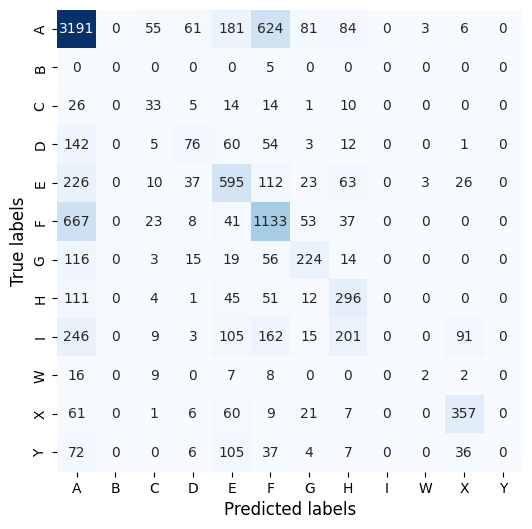

In [39]:
prikaz_matrice_konfuzije(y_test, y_pred)